In [1]:
group1 = [20, 23, 21, 25, 18, 17, 18, 24, 20, 24, 23, 19]
group2 = [24, 25, 21, 22, 23, 18, 17, 28, 24, 27, 21, 23]

In [ ]:
#Задание по курсам

In [2]:
import scipy.stats as stats
import numpy as np
import pandas as pd
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import shapiro

#perform the Mann-Whitney U test
stats. mannwhitneyu(group1, group2)

MannwhitneyuResult(statistic=50.0, pvalue=0.21138945901258455)

In [3]:
df=pd.read_csv('AB_Test_Results.csv')

In [4]:
df

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0
...,...,...,...
9995,1981,control,0.0
9996,502,variant,0.0
9997,9214,variant,0.0
9998,7741,control,0.0


AB-тест — это эксперимент, который используется большинством крупных компаний для оценки запуска нового функционала. При анализе и проведении эксперимента могут возникнуть различные трудности. В этом наборе данных и анализе приведены несколько типичных проблемных случаев из реальной жизни.

In [5]:
df.info(), df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       10000 non-null  int64  
 1   VARIANT_NAME  10000 non-null  object 
 2   REVENUE       10000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 234.5+ KB


(None,
 USER_ID           int64
 VARIANT_NAME     object
 REVENUE         float64
 dtype: object)

In [6]:
df.describe()

,USER_ID,REVENUE
count,10000.000000,10000.000000
mean,4981.080200,0.099447
std,2890.590115,2.318529
min,2.000000,0.000000
25%,2468.750000,0.000000
50%,4962.000000,0.000000
75%,7511.500000,0.000000
max,10000.000000,196.010000


In [7]:
df.REVENUE.value_counts()

0.00     9848
1.25       10
1.01        6
3.25        6
0.04        5
         ... 
2.19        1
2.14        1
17.08       1
2.00        1
2.92        1
Name: REVENUE, Length: 101, dtype: int64

In [8]:
#считаем количество пользователей, нет ли пользователей, которые попали одновременно в 2 группы
double_variant_count = df.groupby('USER_ID')['VARIANT_NAME'].nunique().value_counts()
double_variant_count

1    4783
2    1541
Name: VARIANT_NAME, dtype: int64

In [9]:
double_variant_count / double_variant_count.sum()

1    0.756325
2    0.243675
Name: VARIANT_NAME, dtype: float64

Мы видим, что такие пользователи есть и их достаточно много — 24%. Если учесть этих пользователей, то эффект от изменений в эксперименте будет размыт. Поэтому исключаем пользовательские данные из расчета изменений в эксперименте

In [10]:
df.sort_values(by='REVENUE', ascending=False).iloc[:10]

,USER_ID,VARIANT_NAME,REVENUE
1437,3342,control,196.01
6447,2881,variant,58.63
7642,7206,variant,57.46
9421,6792,control,41.53
8168,2166,control,29.32
9125,831,control,25.98
2482,7356,variant,23.04
6412,1053,control,20.07
5217,3684,variant,19.47
5530,282,control,18.56


In [11]:
df = df[df['USER_ID'] != 3342]

In [12]:
#пользователи, которые попали в 1 группу пользователей
single_variant_users = (df.groupby('USER_ID')['VARIANT_NAME'].nunique() == 1)

In [13]:
single_variant_users

USER_ID
2         True
3        False
4         True
5         True
6         True
         ...  
9993      True
9995      True
9996     False
9998      True
10000    False
Name: VARIANT_NAME, Length: 6323, dtype: bool

In [15]:
#передаём группу пользователей
single_variant_users = single_variant_users[single_variant_users]
single_variant_users

USER_ID
2       True
4       True
5       True
6       True
9       True
        ... 
9990    True
9992    True
9993    True
9995    True
9998    True
Name: VARIANT_NAME, Length: 4782, dtype: bool

In [17]:
df = df[df['USER_ID'].isin(single_variant_users.index)]

In [18]:
df

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
4,6174,variant,0.0
5,2380,variant,0.0
7,9168,control,0.0
9,7548,control,0.0
...,...,...,...
9993,2400,variant,0.0
9994,3129,control,0.0
9996,502,variant,0.0
9998,7741,control,0.0


In [63]:
df.shape

(6069, 3)

In [64]:
df = df.groupby(by=['USER_ID', 'VARIANT_NAME']).sum().reset_index()
df

,USER_ID,VARIANT_NAME,REVENUE
0,2,control,0.0
1,4,variant,0.0
2,5,variant,0.0
3,6,variant,0.0
4,9,variant,0.0
...,...,...,...
4777,9990,variant,0.0
4778,9992,control,0.0
4779,9993,control,0.0
4780,9995,variant,0.0


In [65]:
df.REVENUE.value_counts()

0.00    4687
1.25       5
4.27       3
2.99       3
0.02       3
        ... 
5.98       1
2.16       1
0.60       1
3.00       1
3.79       1
Name: REVENUE, Length: 70, dtype: int64

In [66]:
# get metrics by groups
all_stat = df.groupby(by='VARIANT_NAME').agg({'USER_ID': 'nunique',
                                               'REVENUE': ['sum', 'mean', 'median', 'count']})
all_stat 

USER_ID REVENUE                       
             nunique     sum      mean median count
VARIANT_NAME                                       
control         2389  274.55  0.114923    0.0  2389
variant         2393  179.32  0.074935    0.0  2393

In [67]:
paid_stat = df.loc[df.REVENUE != 0].groupby(by='VARIANT_NAME').agg({'USER_ID': 'nunique',
                                                                     'REVENUE': ['sum', 'mean', 'median', 'count']})
paid_stat

USER_ID REVENUE                       
             nunique     sum      mean median count
VARIANT_NAME                                       
control           53  274.55  5.180189   2.99    53
variant           42  179.32  4.269524   2.97    42

C:\Users\Mi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Mi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Mi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

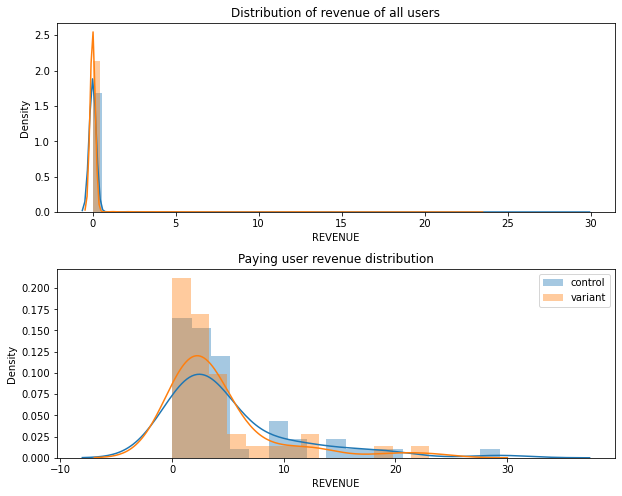

In [19]:
f, axes = plt.subplots(2, figsize=(10,8))
# build graphs of distributions of all users
sns.distplot(df.loc[df['VARIANT_NAME'] == 'control', 'REVENUE'], ax = axes[0], label='control')
sns.distplot(df.loc[df['VARIANT_NAME'] == 'variant', 'REVENUE'], ax = axes[0], label='variant')
axes[0].set_title('Distribution of revenue of all users')



# build graphs of distributions of paying users
sns.distplot(df.loc[(df['VARIANT_NAME'] == 'control') & (df['REVENUE'] > 0), 'REVENUE'], ax = axes[1], label='control' )
sns.distplot(df.loc[(df['VARIANT_NAME'] == 'variant') & (df['REVENUE'] > 0), 'REVENUE'], ax = axes[1], label='variant' )
axes[1].set_title('Paying user revenue distribution')
plt.legend()
plt.subplots_adjust(hspace = 0.3)

Тест Манна-Уитни Проверим значение статистики теста Манна-Уитни. Некоторые источники имеют ограничение применимости в случае дублирования данных. В нашей выборке очень много повторов, и особенно много нулевых значений, поэтому в данном случае нужно внимательно относиться к этому критерию.



In [20]:
mannwhitneyu(df.loc[df.VARIANT_NAME == 'variant', 'REVENUE'], df.loc[df.VARIANT_NAME == 'control', 'REVENUE'])

MannwhitneyuResult(statistic=4588312.0, pvalue=0.2859842308619548)

Для всей выборки

In [21]:
mannwhitneyu(df.loc[(df.VARIANT_NAME == 'variant') & (df.REVENUE > 0), 'REVENUE'],
             df.loc[(df.VARIANT_NAME == 'control') & (df.REVENUE > 0), 'REVENUE'])

MannwhitneyuResult(statistic=1030.0, pvalue=0.4218148352342157)

Платящие больше нуля

Т.о. различий в группах платящих пользователей нет

In [43]:
metrics = df.groupby('VARIANT_NAME').agg({'REVENUE': 'count'}).reset_index()

In [44]:
metrics

,VARIANT_NAME,REVENUE
0,control,3025
1,variant,3044


In [45]:
metrics_paid = df.query('REVENUE>0').groupby('VARIANT_NAME').agg({'REVENUE': 'count'}).reset_index()

In [46]:
metrics = metrics.merge(metrics_paid, on='VARIANT_NAME')
metrics 

,VARIANT_NAME,REVENUE_x,REVENUE_y
0,control,3025,53
1,variant,3044,43


Разница конверсий платящих пользователей

REVENUE_x - к-во пользователей, REVENUE_y - количество платящих пользователей

In [49]:
chistat, pval, table = proportion.proportions_chisquare(metrics['REVENUE_y'], metrics['REVENUE_x'])

In [48]:
import statsmodels.stats.proportion as proportion

In [50]:
pval

0.2892743961405293

=> различий в конверсиях нет

In [51]:
metrics['conv']=metrics['REVENUE_y']/metrics['REVENUE_x']*100
metrics

,VARIANT_NAME,REVENUE_x,REVENUE_y,conv
0,control,3025,53,1.752066
1,variant,3044,43,1.412615


# Расчет мощности

In [52]:
import statsmodels.stats.proportion as proportion
import numpy as np

conv_a = 20
conv_b = 35
clicks_a = 500
clicks_b = 500
converted = np.array([conv_a, conv_b])
clicks = np.array([clicks_a,clicks_b])

chisq, pvalue, table = proportion.proportions_chisquare(converted, clicks)
print('Results are ','chisq =%.3f, pvalue = %.3f'%(chisq, pvalue))


Results are  chisq =4.329, pvalue = 0.037


=> различия в группах есть

In [53]:
import statsmodels.stats.power as smp # импортируем нужную библиотеку
chipower = smp.GofChisquarePower() # помещаем нужный модуль библиотеки в удобную переменную

In [54]:
nobs=2393 #max выборка
alpha=0.05
p0=53/2389
p1=42/2393

In [72]:
#расчет мощности критерия
power = chipower.solve_power(effect_size = chi2_effect_size(p0, p1), # конверсии
                             nobs = nobs, # размер выборки
                             alpha = alpha, # значение ошибки первого рода на наших данных
                             power = None) # функция вернет значение, указаное как None
power

0.3309124284337396

Мощность низкая - с вероятностью более чем 66 процентов мы бы не увидели статистически значимых различий

Задаем значения всех параметров, последнюю оставляем none

In [56]:
# переведем формулу в функцию в коде
def chi2_effect_size(p0, p1):
    return np.sqrt(((p0 - p1)**2 / p0))

In [71]:
#расчет мощности критерия
power = chipower.solve_power(effect_size = chi2_effect_size(p0, p1), # конверсии
                             nobs = None, # размер выборки
                             alpha = alpha, # значение ошибки первого рода на наших данных
                             power = 0.8) # функция вернет значение, указаное как None
power

8109.373847167332

 Сколько нам надо было человек, чтобы получилась такая мощность
 
 chipower значений 1 и 0

BOOTSTRAP

In [58]:
test = np.array(df.loc[df.VARIANT_NAME == 'variant', 'REVENUE'])

In [59]:
ctrl = np.array(df.loc[df.VARIANT_NAME == 'control', 'REVENUE'])

In [60]:
test.shape

(3044,)

In [61]:
ctrl.shape

(3025,)

In [62]:
array = bs.bootstrap_ab(test = test, ctrl = ctrl
                              , stat_func = bs_stats.mean
                              , compare_func = bs_compare.difference
                              , return_distribution = True)

In [63]:
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
import bootstrapped.compare_functions as bs_compare

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

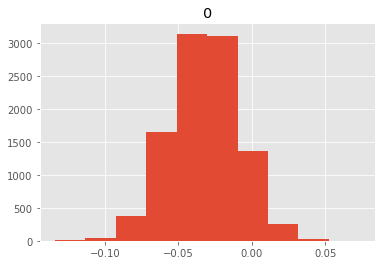

In [64]:
pd.DataFrame(array).hist()

In [65]:
np.percentile(array, 2.5)

-0.07783157394033513

In [66]:
np.percentile(array, 97.5)

0.012186155884492973

In [67]:
# Объявим функцию, которая позволит проверять гипотезы с помощью бутстрапа
def get_bootstrap(
    column_1, # числовые значения первой выборки
    column_2, # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_len = max([len(column_1), len(column_2)])
    boot_data = []
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        samples_1 = column_1.sample(
            boot_len,
            replace = True # параметр возвращения
        ).values
        
        samples_2 = column_2.sample(
            boot_len,
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2)) # mean() - применяем статистику
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    ci = pd_boot_data.quantile([left_quant, right_quant])
  
    #p-value:
    p_1 = norm.cdf(
        x = 0,
        loc = np.mean(boot_data),
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0,
        loc = -np.mean(boot_data),
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    plt.hist(pd_boot_data[0], bins = 50)
    
    plt.style.use('ggplot')
    plt.vlines(ci,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data,
            "ci": ci,
            "p_value": p_value}

  0%|          | 0/2000 [00:00<?, ?it/s]

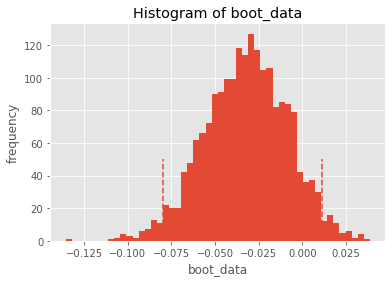

In [68]:
booted_data = get_bootstrap(df.loc[df.VARIANT_NAME == 'variant', 'REVENUE'], df.loc[df.VARIANT_NAME == 'control', 'REVENUE'], boot_it = 2000)

In [69]:
booted_data["p_value"]

0.17534493501437876

In [70]:
booted_data["ci"]

,0
0.025,-0.079822
0.975,0.011548
